### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42
)
print("Dependent Variables: \n", display(pd.DataFrame(X)))
print("\n\nIndependent Variable: \n", pd.Series(y))

,0,1
0,0.559426,2.388694
1,1.312175,-0.717315
2,-1.559849,-1.924874
3,-2.281386,-0.136856
4,1.560704,-0.427958
...,...,...
95,1.804741,-0.149941
96,1.154661,-0.955482
97,-0.567725,1.389918
98,-1.158068,0.865620


Dependent Variables: 
 None


Independent Variable: 
 0     0
1     1
2     0
3     0
4     1
     ..
95    1
96    1
97    0
98    0
99    0
Length: 100, dtype: int64


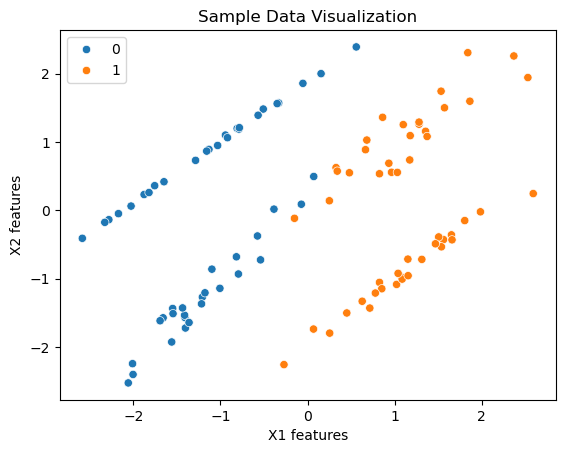

In [6]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.title('Sample Data Visualization')
plt.xlabel("X1 features")
plt.ylabel("X2 features")
plt.legend()

In [7]:
X_with_intercept = sm.add_constant(X)

In [10]:
pd.DataFrame(X).corr()

,0,1
0,1.000000,0.360942
1,0.360942,1.000000


In [5]:
import warnings

warnings.filterwarnings("ignore")
model = sm.GLM(y, X_with_intercept, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 May 2025   Deviance:                   5.2422e-09
Time:                        11:41:00   Pearson chi2:                 2.62e-09
No. Iterations:                    29   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.8114   6.37e+04      0.002      0.9

In [6]:
coef = result.params
intercept = coef[0]  # Intercept
slope1 = coef[1]  # Coefficient for X1
slope2 = coef[2]  # Coefficient for X2
print("M1: ", slope1, "M2: ", slope2, "c: ", intercept)

M1:  1040.950623893459 M2:  -597.9335529011405 c:  106.81135280507287


<Axes: title={'center': 'Logistic Regression Decision Boundary (Statsmodels)'}, xlabel='Feature 1', ylabel='Feature 2'>

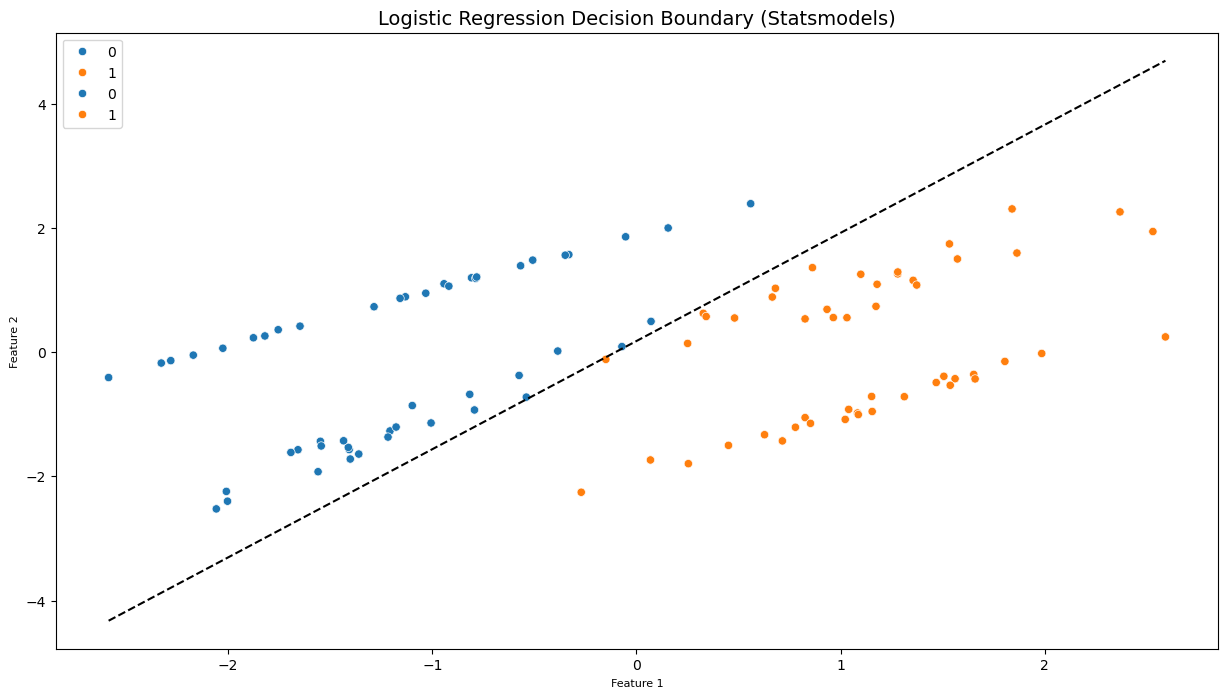

In [7]:
s_x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
s_y_vals = (
    -(slope1 * s_x_vals + intercept) / slope2
)  # Solve for X2 in terms of X1 and coefficients
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.plot(s_x_vals, s_y_vals, color="black", linestyle="--")
plt.title("Logistic Regression Decision Boundary (Statsmodels)", fontsize=14)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [38]:
model = LogisticRegression().fit(X,y)
model

LogisticRegression()

In [43]:
print(model.intercept_,model.coef_)

[0.05126339] [[ 3.23216767 -0.84594518]]


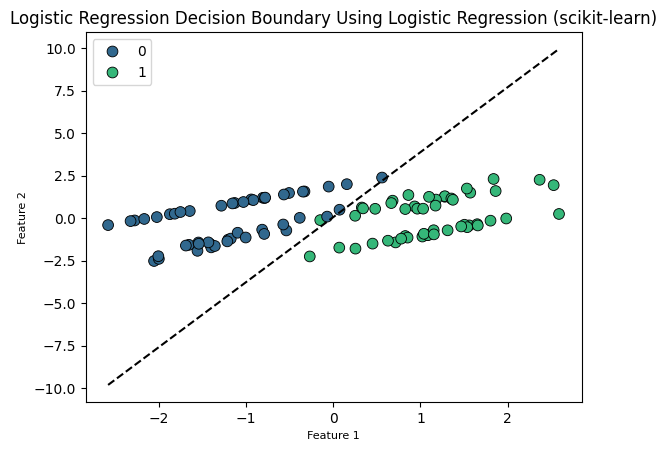

In [40]:
coef = model.coef_[0]
intercept = model.intercept_

# Decision boundary line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", edgecolor="k", s=60)
plt.plot(x_vals, y_vals, color="black", linestyle="--")
plt.title(
    "Logistic Regression Decision Boundary Using Logistic Regression (scikit-learn)"
)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
plt.show()